## Problem Statement
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.


Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

## Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:

- Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
- Highly Malignant: It denotes comments that are highly malignant and hurtful.
- Rude: It denotes comments that are very rude and offensive.
- Threat: It contains indication of the comments that are giving any threat to someone.
- Abuse: It is for comments that are abusive in nature.
- Loathe: It describes the comments which are hateful and loathing in nature.
- ID: It includes unique Ids associated with each comment text given.
- Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. You need to build a model that can differentiate between comments and its categories.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix

### Importing the Dataset

In [3]:
data = pd.read_csv('D://mtrain.csv')
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test = pd.read_csv('D://mtest.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# Exploratory Data Analysis (EDA)

In [5]:
# Checking the shape of Dataset
data.shape

(159571, 8)

- The dataset contains 159571 rows and 8 columns.

### Checking the type of dataset

In [6]:
data.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

- We can see, id and comment_text are having an object datatype and rest of all are having int datatype.
- id not important feature so i will drop this feature while selecting features.

### Checking Unique values

In [7]:
data.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

- Id and comment_text are having unique values rest of all are having only 2 unique values.
- It means that, most of the features containing only two unique values.

### Checking Null values

In [8]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

- We can see, there is no missing value present in data set.

In [9]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = data.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(data[data[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(data)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(data),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(data),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


- Above ratio shows that our dataframe consists 10.17% of Malignant Comments and 89.83% of Normal Comments. Hence, it is clear that the dataset is imbalanced and needs to be treated accordingly during train test split of model training.

In [10]:
# Data Cleansing

# as the feature 'id' has no relevance w.r.t. model training I am dropping this column
data.drop(columns=['id'],inplace=True)
# converting comment text to lowercase format
data['comment_text'] = data.comment_text.str.lower()
data.head()


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


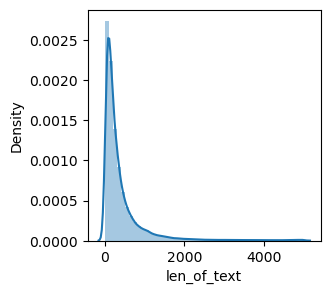

In [11]:
plt.figure(figsize=(3,3))
data['len_of_text'] = data['comment_text'].apply(len)
sns.distplot(data['len_of_text'],kde=True)
plt.show()

- We can see, upto 2000 words comment test are used. It seem to be people are used so many malignant words while commenting.
- But there is also more 4000 word but in less numbers are also used malignant words to commenting.

malignant


0    144277
1     15294
Name: malignant, dtype: int64


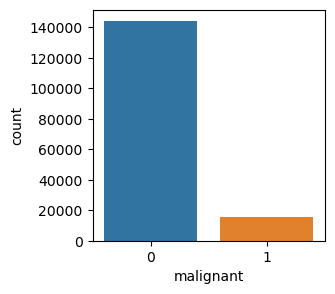

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


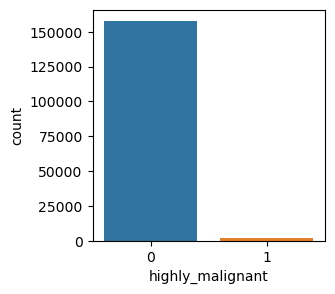

loathe


0    158166
1      1405
Name: loathe, dtype: int64


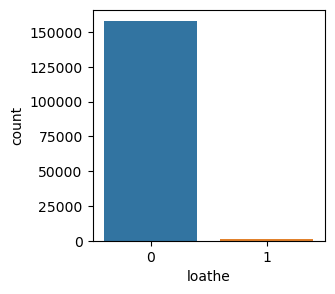

rude


0    151122
1      8449
Name: rude, dtype: int64


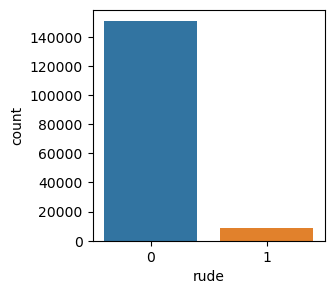

abuse


0    151694
1      7877
Name: abuse, dtype: int64


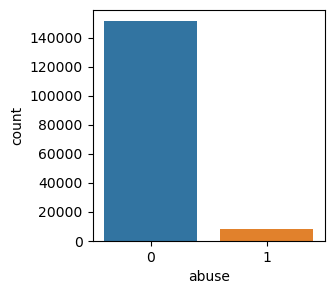

threat


0    159093
1       478
Name: threat, dtype: int64


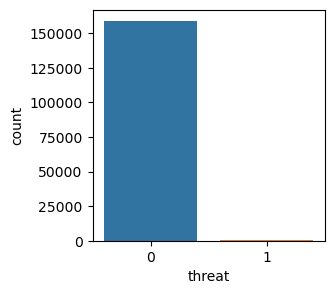

In [12]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(data[i].value_counts())
    plt.figure(figsize=(3,3))
    sns.countplot(data[i])
    plt.show()

- We can see, In malignant categories of comment there are having less malignant comment. 1 has low count than 0 it means that0 may be normal comment 1 many be malignant buth ratio is small.
- In Highly_malignant 1 has less than 0 it meant that there is less highly malignant word using by users. But their magnutude is high because it may causes the dpression to others users.
- In loathe, there is also low percentage of 1 categories.
- In rude categories, rude comment is high than others categories so it may causes another users.
- Rude and Abuse is having almost same quantity of comment but their magnitude or impact will be different. Rude has low impanct thna abuse comment.
- We can see, there is also threat comment but their ration very small but it may have very large impact.

In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [14]:
# checking the length of comments and storing it into another column 'original_length'
# copying data into another object df
df = data.copy()
df['original_length'] = df.comment_text.str.len()

# checking the first five and last five rows here
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,len_of_text,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,295,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,99,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,81,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,116,116


In [15]:
# Convert all messages to lower case
data['comment_text'] = data['comment_text'].str.lower()

# Replace email addresses with 'email'
data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['comment_text'] = data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [16]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\AJIT AND
[nltk_data]     SUJIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\AJIT AND
[nltk_data]     SUJIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

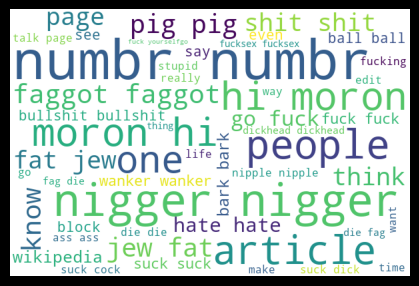

In [18]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- We can see, so many malignant comment are used by users which show in above.
- Pig, wanker, hate, die and shit these are the word are mostly used.

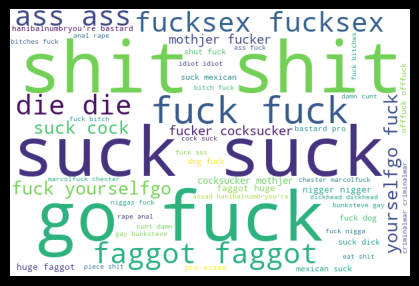

In [19]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- The vocabulary used in all categories is quite similar (expect for 'none' of course). Frequencies are varying a bit across (for example 'fuck' and 'suck'.

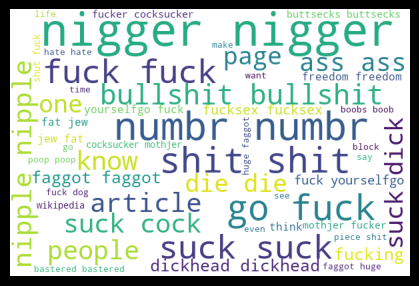

In [20]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- The vocabulary used in all categories is quite similar (expect for 'none' of course). Frequencies are varying a bit across (for example 'fuck' and 'suck'.

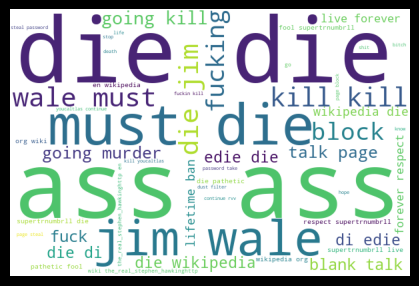

In [21]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- We can see, ass, jim wale, fucking, die and going kill these are the word are mostly used by users for threatning the onothers users.
- Due to this impact of threat massages will causes several risk to users so we need to improved the social media to make user friendly.

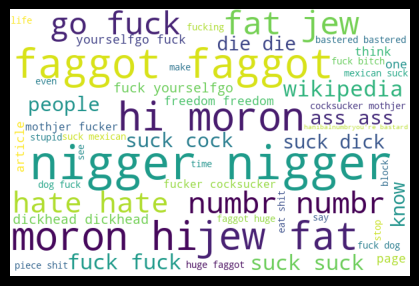

In [22]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- There are so many word are used by user for abusing some one. like, faggot, fuck, morongo, suck, and jew. 
- Here also have highly malignant word also.

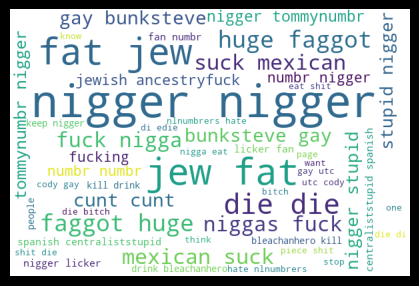

In [23]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = data['comment_text'][data['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(4,4),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

- We can see loathe comment where so many word are used for commenting on others some of is nigger, die, gay, mexican, stupid these word are used to loathe the people or users.

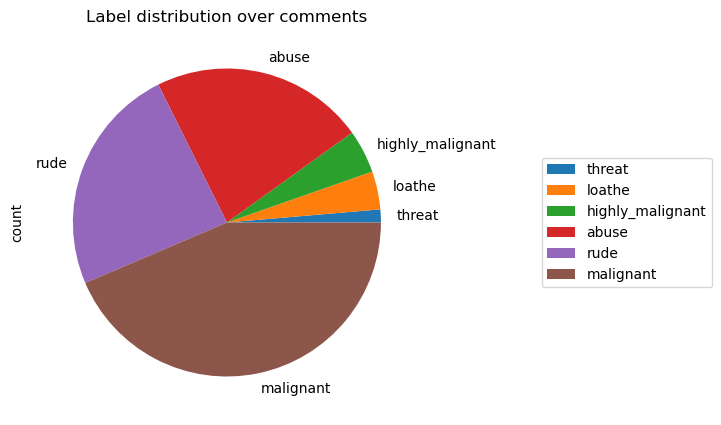

In [24]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = data[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

- We can see, malignant is having maximum comment than others categories followed by rude.
- Threat categories comment is having low count but it has high impact than others.
- Highly malignant comment are having high impactg on user whose face such problem.

In [25]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']

<AxesSubplot:title={'center':'Correlation of features & targets'}>

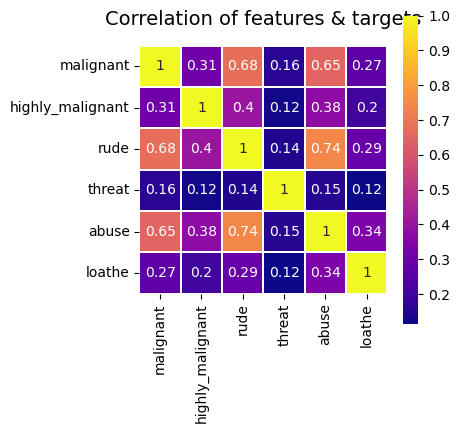

In [26]:
data1 = data[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(4,4))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data1.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

- Indeed, it looks like some of the labels are higher correlated, e.g. abuse-rude has the highest at 0.74,
- followed by malignant-rude and malignant-abuse.

In [27]:
data.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,len_of_text
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67


In [28]:
df = data.drop(columns=['len_of_text'],axis=1)
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0


In [29]:
target_data = df[cols_target]

df['bad'] =df[cols_target].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


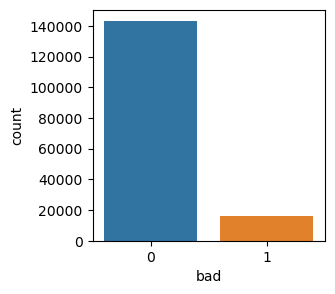

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x="bad" , data = df)
plt.show()

In [64]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df1.comment_text).toarray()
x = features

In [80]:
# Convert text into Vectors by using TfidVectorizer

tf = TfidfVectorizer(max_features=4000)
features = tf.fit_transform(df1.comment_text).toarray()


In [33]:
# Input Variables
X = features

# Output Variable
Y = csr_matrix(df1[output_labels]).toarray()

## Building Model

In [43]:
y = df1[cols_target]

In [44]:
y.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [47]:
 x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss, accuracy_score

model = OneVsRestClassifier(estimator=LogisticRegression())
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, prediction))
print('hamming loss : ', hamming_loss(y_test, prediction))

Accuracy Score:  0.88
hamming loss :  0.04055555555555555


In [51]:
model = OneVsRestClassifier(estimator=RandomForestClassifier())
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, prediction))
print('hamming loss : ', hamming_loss(y_test, prediction))

Accuracy Score:  0.89
hamming loss :  0.03138888888888889


In [52]:
model = OneVsRestClassifier(estimator=SVC())
model.fit(x_train, y_train)

prediction = model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, prediction))
print('hamming loss : ', hamming_loss(y_test, prediction))

Accuracy Score:  0.8866666666666667
hamming loss :  0.03611111111111111


## Hyperparameter Tuning

In [55]:
# RandomForestClassifier
params = {'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}


In [59]:
rf = RandomForestClassifier()

In [56]:
rf = OneVsRestClassifier(estimator=RandomForestClassifier())

In [60]:
grd = GridSearchCV(rf,param_grid = params)
grd.fit(x_train,y_train)

print('Best_params  = > ',grd.best_params_)

Best_params  = >  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [78]:
rf = OneVsRestClassifier(estimator=RandomForestClassifier(criterion='gini',min_samples_leaf=1, max_depth=20,min_samples_split=2, n_estimators=100))

In [79]:
rf.fit(x_train, y_train)

prediction = model.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, prediction))
print('hamming loss : ', hamming_loss(y_test, prediction))

Accuracy Score:  0.8866666666666667
hamming loss :  0.03611111111111111


## Model Save

In [83]:
import joblib
joblib.dump(rf,"malignant_comment_classifier.pkl")

['malignant_comment_classifier.pkl']

### Loading the Model

In [84]:
mod=joblib.load("malignant_comment_classifier.pkl")

In [91]:
print(mod.predict(X))

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
